In [1]:
import torch

In [2]:
!pip install git+https://github.com/facebookresearch/esm.git

  Cloning https://github.com/facebookresearch/esm.git to /tmp/pip-req-build-byr2t9od
  Running command git clone -q https://github.com/facebookresearch/esm.git /tmp/pip-req-build-byr2t9od
  Resolved https://github.com/facebookresearch/esm.git to commit 723e85829b1c175f23d9c1195b0fb47d6b2bf5cd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [3]:
!curl -O https://dl.fbaipublicfiles.com/fair-esm/examples/P62593_reprs.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.5M  100 24.5M    0     0  1909k      0  0:00:13  0:00:13 --:--:-- 2229k


In [4]:
!tar -xzf P62593_reprs.tar.gz

In [5]:
!curl -O https://dl.fbaipublicfiles.com/fair-esm/examples/P62593.fasta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1719k  100 1719k    0     0   727k      0  0:00:02  0:00:02 --:--:--  727k


In [6]:
!pwd

/home/rafsanjani/Dropbox/ABC-Research/Gail-Rosen/Codes


In [7]:
!ls

esm.ipynb  P62593.fasta  P62593_reprs  P62593_reprs.tar.gz


In [8]:
import random
from collections import Counter
from tqdm import tqdm

import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import esm

In [9]:
import scipy
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.pipeline import Pipeline

In [36]:
FASTA_PATH = "./P62593.fasta" # Path to P62593.fasta
EMB_PATH = "/home/rafsanjani/Dropbox/ABC-Research/Gail-Rosen/Codes/P62593_reprs/" # Path to directory of embeddings for P62593.fasta
EMB_LAYER = 34

In [37]:
ys = []
Xs = []
for header, _seq in esm.data.read_fasta(FASTA_PATH):
    scaled_effect = header.split('|')[-1]
    ys.append(float(scaled_effect))
    fn = f'{EMB_PATH}/{header[1:]}.pt'
    embs = torch.load(fn)
    Xs.append(embs['mean_representations'][EMB_LAYER])
Xs = torch.stack(Xs, dim=0).numpy()
print(len(ys))
print(Xs.shape)

5397
(5397, 1280)


In [27]:
ys = []
Xs = []

C=1
for header, _seq in esm.data.read_fasta(FASTA_PATH):
    # scaled_effect = header.split('|')[-1]
    print(C)
    print(_seq)
    print()
    if C==10:
        break
    C+=1

1
MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW

2
MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW

3
MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW

4
MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMS

In [28]:
emb  = torch.load('/home/rafsanjani/Dropbox/ABC-Research/Gail-Rosen/Codes/P62593_reprs/0|beta-lactamase_P20P|1.581033423.pt')

In [29]:
emb

{'label': '0|beta-lactamase_P20P|1.581033423',
 'mean_representations': {34: tensor([-1.9424, -0.2423,  0.2781,  ...,  0.8565, -0.3662,  0.3713])}}

In [32]:
emb['mean_representations']

{34: tensor([-1.9424, -0.2423,  0.2781,  ...,  0.8565, -0.3662,  0.3713])}

In [33]:
emb['mean_representations'][34]

tensor([-1.9424, -0.2423,  0.2781,  ...,  0.8565, -0.3662,  0.3713])

In [34]:
emb['mean_representations'][34].shape

torch.Size([1280])

In [38]:
train_size = 0.8
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, train_size=train_size, random_state=42)

In [39]:
Xs_train.shape, Xs_test.shape, len(ys_train), len(ys_test)

((4317, 1280), (1080, 1280), 4317, 1080)

In [40]:
Xs_train.shape, Xs_test.shape

((4317, 1280), (1080, 1280))

In [41]:
len(ys_train), len(ys_test)

(4317, 1080)

In [46]:
ys_train

[0.548745027,
 0.8732486420000001,
 1.010644849,
 1.012578,
 0.958899345,
 0.6516653729999999,
 1.149113002,
 0.8885604090000001,
 0.975601749,
 1.00675343,
 0.613973817,
 -0.006251945,
 0.635424169,
 1.035332007,
 0.5439875,
 0.010294185,
 1.004835526,
 0.771706421,
 0.925316761,
 0.989871677,
 -0.0015119139999999998,
 0.019660878,
 0.790189611,
 0.978387813,
 0.56642886,
 1.009819693,
 0.6681206120000001,
 0.5930258110000001,
 0.827650518,
 1.058884685,
 0.918853802,
 0.245058649,
 0.969296433,
 0.481797312,
 0.456200166,
 0.390552199,
 0.554775225,
 0.888810604,
 1.050530784,
 0.86700646,
 0.925665764,
 1.014403743,
 1.126812329,
 0.8417474690000001,
 0.8449814409999999,
 0.937624898,
 0.840728118,
 1.055182672,
 0.242455053,
 0.61735732,
 0.424001183,
 0.008261346999999999,
 1.012524345,
 0.967288223,
 0.393759783,
 1.00280474,
 0.563827219,
 0.956388399,
 0.838455835,
 0.982950254,
 0.991014755,
 1.007303567,
 0.730549267,
 0.920430131,
 0.963312852,
 1.011181792,
 0.987299844,
 0

In [42]:
num_pca_components = 60
pca = PCA(num_pca_components)
Xs_train_pca = pca.fit_transform(Xs_train)

In [43]:
Xs_train_pca.shape

(4317, 60)

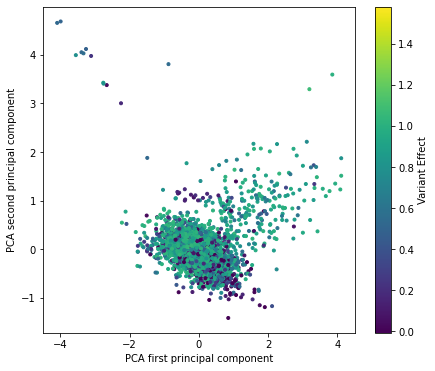

In [45]:
fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sc = ax.scatter(Xs_train_pca[:,0], Xs_train_pca[:,1], c=ys_train, marker='.')
ax.set_xlabel('PCA first principal component')
ax.set_ylabel('PCA second principal component')
plt.colorbar(sc, label='Variant Effect')

In [47]:
knn_grid = [
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [5, 10],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'model__leaf_size' : [15, 30],
        'model__p' : [1, 2],
    }
    ]

svm_grid = [
    {
        'model': [SVR()],
        'model__C' : [0.1, 1.0, 10.0],
        'model__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree' : [3],
        'model__gamma': ['scale'],
    }
]

rfr_grid = [
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators' : [20],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__max_features': ['sqrt', 'log2'],
        'model__min_samples_split' : [5, 10],
        'model__min_samples_leaf': [1, 4]
    }
]

In [48]:
cls_list = [KNeighborsRegressor, SVR, RandomForestRegressor]
param_grid_list = [knn_grid, svm_grid, rfr_grid]

In [49]:
# make sure data preprocessing (PCA here) is run inside CV to avoid data leakage
pipe = Pipeline(
    steps = (
        ('pca', PCA(num_pca_components)),
        ('model', 'passthrough')
    )
)

result_list = []
grid_list = []
for cls_name, param_grid in zip(cls_list, param_grid_list):
    print(cls_name)
    grid = GridSearchCV(
        estimator = pipe,
        param_grid = param_grid,
        scoring = 'r2',
        verbose = 1,
        n_jobs = -1 # use all available cores
    )
    grid.fit(Xs_train, ys_train)
    result_list.append(pd.DataFrame.from_dict(grid.cv_results_))
    grid_list.append(grid)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
Fitting 5 folds for each of 48 candidates, totalling 240 fits
<class 'sklearn.svm._classes.SVR'>
Fitting 5 folds for each of 12 candidates, totalling 60 fits
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [50]:
result_list[0].sort_values('rank_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__leaf_size,param_model__n_neighbors,param_model__p,param_model__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.951076,0.087456,0.865276,0.075251,"KNeighborsRegressor(algorithm='ball_tree', p=1...",ball_tree,30,5,1,distance,{'model': KNeighborsRegressor(algorithm='ball_...,0.662785,0.693702,0.659549,0.677341,0.626351,0.663946,0.022356,1
25,0.977950,0.053035,1.004027,0.042904,"KNeighborsRegressor(algorithm='ball_tree', p=1...",kd_tree,30,5,1,distance,{'model': KNeighborsRegressor(algorithm='ball_...,0.663887,0.685957,0.656592,0.675742,0.625225,0.661481,0.020720,2
1,0.944734,0.035130,0.825332,0.052464,"KNeighborsRegressor(algorithm='ball_tree', p=1...",ball_tree,15,5,1,distance,{'model': KNeighborsRegressor(algorithm='ball_...,0.666486,0.692181,0.660618,0.667637,0.616374,0.660659,0.024647,3
41,0.942405,0.024919,0.467601,0.012389,"KNeighborsRegressor(algorithm='ball_tree', p=1...",brute,30,5,1,distance,{'model': KNeighborsRegressor(algorithm='ball_...,0.665048,0.691805,0.654735,0.668781,0.621235,0.660321,0.022996,4
17,0.893330,0.049317,1.336320,0.146768,"KNeighborsRegressor(algorithm='ball_tree', p=1...",kd_tree,15,5,1,distance,{'model': KNeighborsRegressor(algorithm='ball_...,0.667526,0.692136,0.661474,0.645374,0.620488,0.657400,0.023803,5


In [51]:
result_list[1].sort_values('rank_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__degree,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,2.305541,0.036823,0.348995,0.013379,SVR(),1.0,3,scale,rbf,"{'model': SVR(), 'model__C': 1.0, 'model__degr...",0.700924,0.690083,0.664617,0.697511,0.671648,0.684957,0.014350,1
10,3.551439,0.103099,0.363394,0.017160,SVR(),10.0,3,scale,rbf,"{'model': SVR(), 'model__C': 10.0, 'model__deg...",0.701554,0.695486,0.650963,0.686572,0.685904,0.684096,0.017560,2
2,2.130514,0.070217,0.395335,0.008969,SVR(),0.1,3,scale,rbf,"{'model': SVR(), 'model__C': 0.1, 'model__degr...",0.607716,0.590218,0.551419,0.601268,0.562897,0.582704,0.021899,3
8,8.543491,0.309614,0.172144,0.003878,SVR(),10.0,3,scale,linear,"{'model': SVR(), 'model__C': 10.0, 'model__deg...",0.528840,0.485991,0.444006,0.514854,0.470224,0.488783,0.030468,4
4,2.896460,0.079636,0.186019,0.006906,SVR(),1.0,3,scale,linear,"{'model': SVR(), 'model__C': 1.0, 'model__degr...",0.527760,0.487127,0.443095,0.516197,0.466979,0.488232,0.031096,5


In [52]:
result_list[2].sort_values('rank_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__criterion,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.479092,0.048229,0.022305,0.003675,"RandomForestRegressor(max_features='sqrt', min...",squared_error,sqrt,1,5,20,{'model': RandomForestRegressor(max_features='...,0.532378,0.555481,0.523629,0.530469,0.506881,0.529768,0.015684,1
2,1.302228,0.028447,0.020631,0.003088,"RandomForestRegressor(max_features='sqrt', min...",squared_error,sqrt,4,5,20,{'model': RandomForestRegressor(max_features='...,0.513562,0.538689,0.526946,0.536422,0.478772,0.518878,0.021918,2
1,1.387410,0.019280,0.023175,0.002148,"RandomForestRegressor(max_features='sqrt', min...",squared_error,sqrt,1,10,20,{'model': RandomForestRegressor(max_features='...,0.507863,0.531636,0.510694,0.551023,0.488589,0.517961,0.021437,3
6,1.196949,0.016737,0.021188,0.001873,"RandomForestRegressor(max_features='sqrt', min...",squared_error,log2,4,5,20,{'model': RandomForestRegressor(max_features='...,0.508787,0.540574,0.500151,0.519040,0.494058,0.512522,0.016354,4
3,1.317329,0.011626,0.021327,0.003191,"RandomForestRegressor(max_features='sqrt', min...",squared_error,sqrt,4,10,20,{'model': RandomForestRegressor(max_features='...,0.512574,0.519795,0.506842,0.520803,0.496203,0.511244,0.009076,5


In [53]:
for grid in grid_list:
    print(grid.best_estimator_.get_params()["steps"][1][1]) # get the model details from the estimator
    print()
    preds = grid.predict(Xs_test)
    print(f'{scipy.stats.spearmanr(ys_test, preds)}')
    print('\n', '-' * 80, '\n')

KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

SpearmanrResult(correlation=0.7929864694733068, pvalue=3.0715200898650435e-234)

 -------------------------------------------------------------------------------- 

SVR()

SpearmanrResult(correlation=0.8005199341189547, pvalue=6.127047190782827e-242)

 -------------------------------------------------------------------------------- 

RandomForestRegressor(max_features='sqrt', min_samples_split=5, n_estimators=20)

SpearmanrResult(correlation=0.7153425803034877, pvalue=5.315976333589207e-170)

 -------------------------------------------------------------------------------- 



In [54]:
!python scripts/extract.py esm1b_t33_650M_UR50S examples/data/some_proteins.fasta examples/data/some_proteins_emb_esm1b/ --repr_layers 0 32 33 --include mean per_tok

python: can't open file 'scripts/extract.py': [Errno 2] No such file or directory


In [55]:
!pwd

/home/rafsanjani/Dropbox/ABC-Research/Gail-Rosen/Codes
